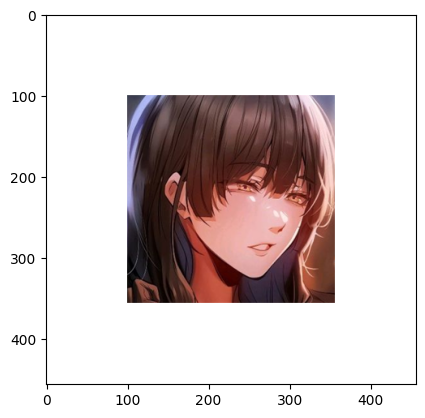

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image, ImageOps
image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/mona_4.jpg"
input_image = Image.open(image_path)

def expand_image_with_white(input_image, expand_size=100):
    width, height = input_image.size
    if width < height:
        diff = height - width
        padding = (diff // 2, 0, diff // 2 + diff % 2, 0)
    elif width > height:
        diff = width - height
        padding = (0, diff // 2, 0, diff // 2 + diff % 2)
    else:
        padding = (expand_size, expand_size, expand_size, expand_size)
    return ImageOps.expand(input_image, padding, fill=(255, 255, 255))
input_image = expand_image_with_white(input_image)
%matplotlib inline
imshow(np.asarray(input_image))
np.asarray(input_image).shape
input_image.save(image_path.split(".")[0]+"_expanded.jpg")

def resize_img(
    input_image,
    max_side=1280,
    min_side=1024,
    size=None,
    pad_to_max_side=False,
    mode=Image.BILINEAR,
    base_pixel_number=64,
):

    w, h = input_image.size
    if size is not None:
        w_resize_new, h_resize_new = size
    else:
        ratio = min_side / min(h, w)
        w, h = round(ratio * w), round(ratio * h)
        ratio = max_side / max(h, w)
        input_image = input_image.resize([round(ratio * w), round(ratio * h)], mode)
        w_resize_new = (round(ratio * w) // base_pixel_number) * base_pixel_number
        h_resize_new = (round(ratio * h) // base_pixel_number) * base_pixel_number
    input_image = input_image.resize([w_resize_new, h_resize_new], mode)

    if pad_to_max_side:
        res = np.ones([max_side, max_side, 3], dtype=np.uint8) * 255
        offset_x = (max_side - w_resize_new) // 2
        offset_y = (max_side - h_resize_new) // 2
        res[offset_y : offset_y + h_resize_new, offset_x : offset_x + w_resize_new] = (
            np.array(input_image)
        )
        input_image = Image.fromarray(res)
    return input_image

In [44]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import insightface
detector_paths = ['/ML-A100/team/mm/gujiasheng/InstantID/models/antelopev2/scrfd_10g_bnkps.onnx', '/ML-A100/team/mm/gujiasheng/insightface/detection/scrfd/onnx/scrfd_10g_bnkps_anime.onnx']
for detector_path in detector_paths:
    print(detector_path)
    detector = insightface.model_zoo.get_model(detector_path)

    detector.prepare(ctx_id=0, det_thresh=0.1, input_size=(640, 640))

    import cv2
    import numpy as np
    from PIL import Image
    # image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/mona_2_expanded.jpg"
    image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/small_image.jpg"
    # image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/mona_2.jpg"
    face_image = Image.open(image_path)
    face_image = resize_img(face_image)
    face_info = detector.detect(cv2.cvtColor(np.array(face_image), cv2.COLOR_RGB2BGR))
    # print(face_info)
    for face_bbox in face_info[0]:
        print("det_thresh:", face_bbox[4])


/ML-A100/team/mm/gujiasheng/InstantID/models/antelopev2/scrfd_10g_bnkps.onnx
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_max_tuning_duration_ms': '0', 'use_ep_level_unified_stream': '0', 'tunable_op_enable': '0', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'tunable_op_tuning_enable': '0', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_external_alloc': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'has_user_compute_stream': '0', 'gpu_mem_limit': '18446744073709551615', 'device_id': '0'}}
/ML-A100/team/mm/gujiasheng/insightface/detection/scrfd/onnx/scrfd_10g_bnkps_anime.onnx
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvid

In [47]:
from insightface.app import FaceAnalysis
face_analysis = FaceAnalysis(
    name="antelopev2",
    root="./",
    providers=["CUDAExecutionProvider", "CPUExecutionProvider"],
    # allowed_modules=['detection']
)
face_analysis.prepare(ctx_id=0, det_thresh=0.5, det_size=(640, 640))


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_max_tuning_duration_ms': '0', 'use_ep_level_unified_stream': '0', 'tunable_op_enable': '0', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'tunable_op_tuning_enable': '0', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_external_alloc': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'has_user_compute_stream': '0', 'gpu_mem_limit': '18446744073709551615', 'device_id': '0'}}
find model: ./models/antelopev2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0', 'enable_skip_layer_no

In [46]:
face_analysis.models

{'landmark_3d_68': <insightface.model_zoo.landmark.Landmark at 0x7ff398706da0>,
 'landmark_2d_106': <insightface.model_zoo.landmark.Landmark at 0x7ff3085ad750>,
 'genderage': <insightface.model_zoo.attribute.Attribute at 0x7ff3b7f2e380>,
 'recognition': <insightface.model_zoo.arcface_onnx.ArcFaceONNX at 0x7ff3086e75e0>,
 'detection': <insightface.model_zoo.retinaface.RetinaFace at 0x7ff3085af430>}

set det-size: (640, 640)
face_infos size 0


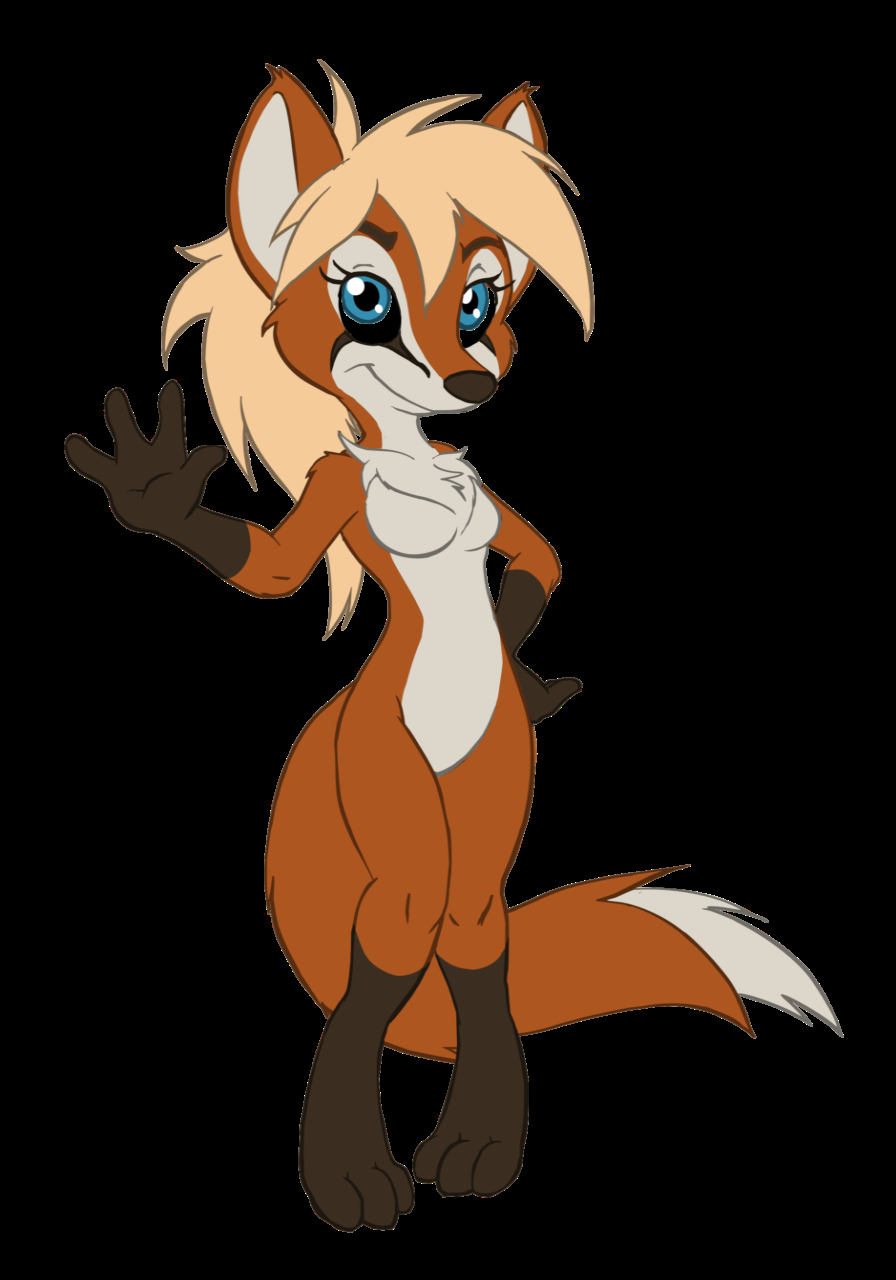

In [63]:
import cv2
from pipeline_stable_diffusion_xl_instantid import (
    StableDiffusionXLInstantIDPipeline,
    draw_kps,
)
import numpy as np
from PIL import Image


# image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/mona_4_expanded.jpg"
image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/furry4.jpg"
# image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/mona_1.jpg"
face_image = Image.open(image_path)
face_image = resize_img(face_image)

face_analysis.prepare(ctx_id=0, det_thresh=0.1, det_size=(640, 640))
# face_image = expand_image_with_white(face_image)
face_infos = face_analysis.get(cv2.cvtColor(np.array(face_image), cv2.COLOR_RGB2BGR))
face_infos = sorted(
    face_infos,
    key=lambda x: (x["bbox"][2] - x["bbox"][0]) * (x["bbox"][3] - x["bbox"][1]),
)
print("face_infos size", len(face_infos))
for face_info in face_infos:
    print(face_info["det_score"])
# face_emb = face_info["embedding"]
# face_kps = draw_kps(face_image, face_info["kps"])

rimg = face_analysis.draw_on(cv2.cvtColor(np.array(face_image), cv2.COLOR_RGB2BGR), face_infos)
# cv2.imwrite("./t1_output.jpg", rimg)
face_with_bbox_rgb = cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB)

# 将NumPy数组转换回PIL Image对象
face_with_bbox_pil = Image.fromarray(face_with_bbox_rgb)

# 显示绘制了边界框的图像
face_with_bbox_pil.show()

In [16]:
import numpy as np
from PIL import Image

def pad_to_768_1344(
    input_image,
    mode=Image.BILINEAR,
    base_pixel_number=64,
):

    w, h = input_image.size

    ratio = 768/w
    w_resize_new = 768
    h_resize_new = (round(ratio * h) // base_pixel_number) * base_pixel_number

    input_image = input_image.resize([w_resize_new, h_resize_new], mode)
    res = np.ones([1344, 768, 3], dtype=np.uint8) * 255
    offset_x = (768 - w_resize_new) // 2
    offset_y = (1344 - h_resize_new) // 2
    res[offset_y : offset_y + h_resize_new, offset_x : offset_x + w_resize_new] = (
        np.array(input_image)
    )
    input_image = Image.fromarray(res)

    return input_image

def pad_to_assigned_size(
    input_image,
    w_side=768,
    h_side=1344,
    mode=Image.BILINEAR,
    base_pixel_number=64,
):

    w, h = input_image.size

    ratio = w_side/w
    w_resize_new = w_side
    h_resize_new = (round(ratio * h) // base_pixel_number) * base_pixel_number

    input_image = input_image.resize([w_resize_new, h_resize_new], mode)
    res = np.ones([h_side, w_side, 3], dtype=np.uint8) * 255
    offset_y = (h_side - h_resize_new) // 2
    if offset_y < 0:
        res = np.array(input_image)[:h_side, :]
    else:
        res[offset_y : offset_y + h_resize_new, : w_resize_new] = (
            np.array(input_image)
        )
    input_image = Image.fromarray(res)

    return input_image


def resize_img(
    input_image,
    max_side=1280,
    min_side=1024,
    size=None,
    pad_to_max_side=False,
    mode=Image.BILINEAR,
    base_pixel_number=64,
):

    w, h = input_image.size
    if size is not None:
        w_resize_new, h_resize_new = size
    else:
        ratio = min_side / min(h, w)
        w, h = round(ratio * w), round(ratio * h)
        ratio = max_side / max(h, w)
        input_image = input_image.resize([round(ratio * w), round(ratio * h)], mode)
        w_resize_new = (round(ratio * w) // base_pixel_number) * base_pixel_number
        h_resize_new = (round(ratio * h) // base_pixel_number) * base_pixel_number
    input_image = input_image.resize([w_resize_new, h_resize_new], mode)

    if pad_to_max_side:
        res = np.ones([max_side, max_side, 3], dtype=np.uint8) * 255
        offset_x = (max_side - w_resize_new) // 2
        offset_y = (max_side - h_resize_new) // 2
        res[offset_y : offset_y + h_resize_new, offset_x : offset_x + w_resize_new] = (
            np.array(input_image)
        )
        input_image = Image.fromarray(res)
    return input_image


(1920, 2618)
(360, 1280)


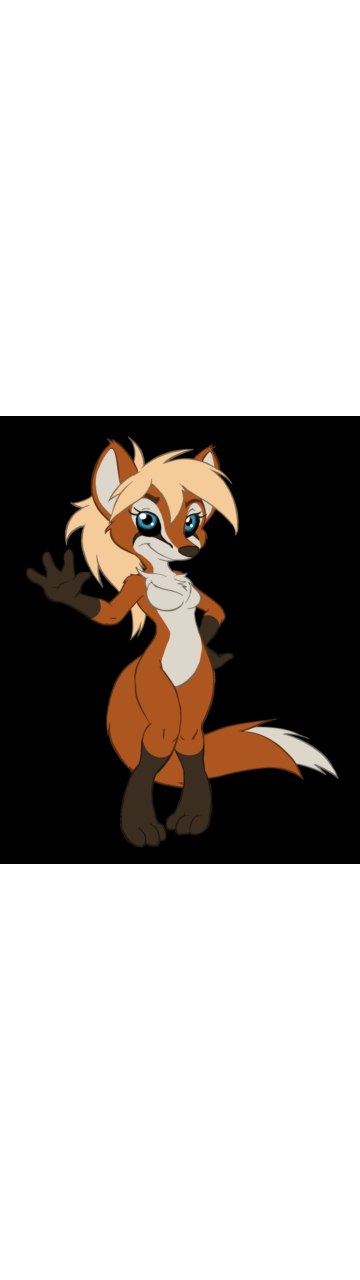

In [21]:
# image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/mona_4_expanded.jpg"
image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/furry4.jpg"
# image_path = "/ML-A100/team/mm/gujiasheng/InstantID/examples/mona_1.jpg"
face_image = Image.open(image_path)
print(face_image.size)
face_image = face_image.convert("RGB")
face_image = pad_to_assigned_size(face_image, w_side=360, h_side=1280)

print(face_image.size)
face_image

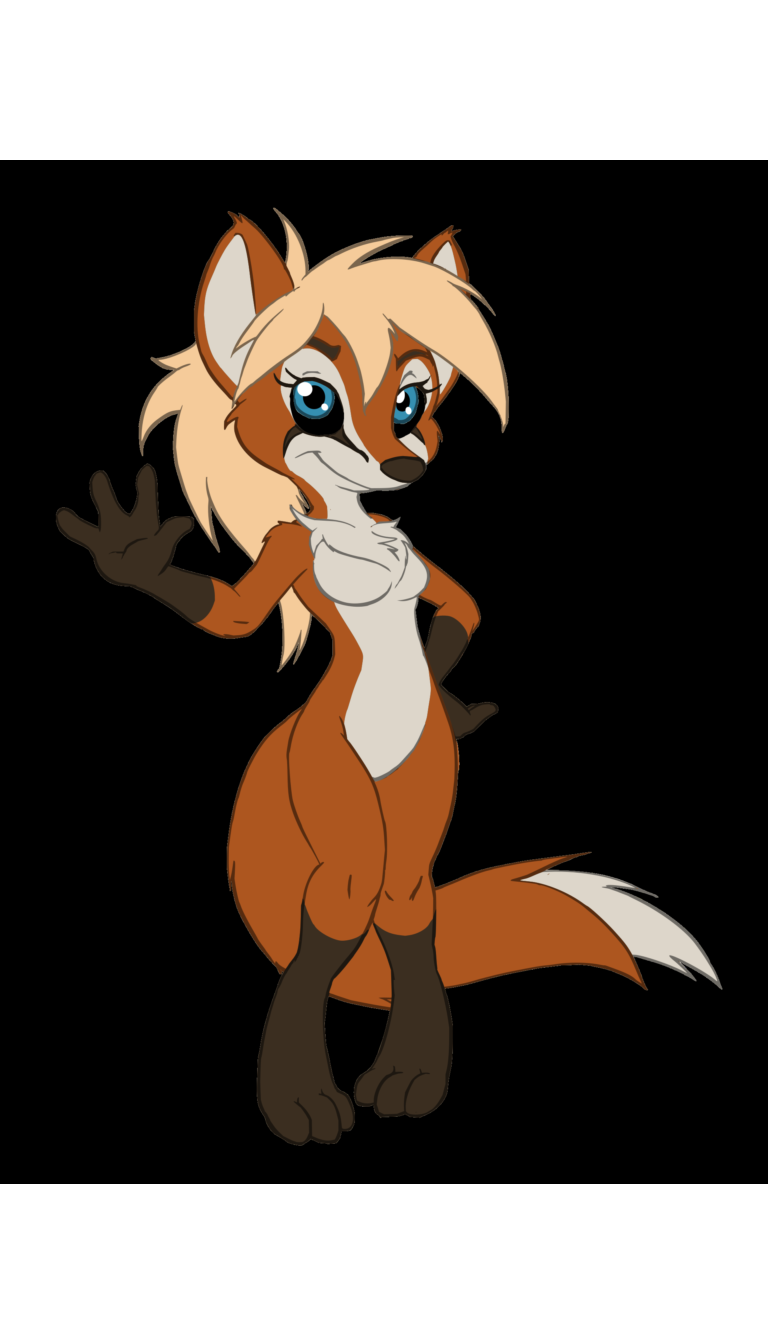

In [23]:
face_image.show()

In [1]:
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
import time

import gradio as gr

from transformers import pipeline
from diffusers import DiffusionPipeline
from accelerate import PartialState # using multiple GPUs

In [2]:
class CFG:
    diffusion_model_name = '/ML-A100/team/mm/gujiasheng/model/stable-diffusion-v1-5'

In [3]:
%%time

diffusion_pipeline = DiffusionPipeline.from_pretrained(CFG.diffusion_model_name)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

CPU times: user 993 ms, sys: 2.35 s, total: 3.34 s
Wall time: 8.15 s


In [16]:
def diffusion(prompt, pipeline = diffusion_pipeline):
    
    ### using multiple GPUs (kaggle 2 * T4)
    distributed_state = PartialState()
    pipeline.to(distributed_state.device)
    with distributed_state.split_between_processes([prompt,prompt]) as prompt:
        result = pipeline(prompt, num_inference_steps=10)
        generated_image = result.images[0]
        generated_image.save(f"./{prompt}.png", format='PNG')
        
    ### single GPU (colab)
#     result = pipeline(prompt)
#     generated_image = result.images[0]
#     generated_image.save(f"./{prompt}.png", format='PNG')
    
    return generated_image, result

In [17]:
def generate(prompt):

    start = time.time()

    try:
        output, result = diffusion(prompt)
        end = time.time()
        time_elapsed = int( round( (end - start), 0) )
        time_elapsed_str = f'{str(time_elapsed)} s'
        
        return output, time_elapsed_str, result

    except Exception as e:
        print('Error:', e)
        return None, e

  0%|          | 0/10 [00:00<?, ?it/s]

36 s
CPU times: user 21min 35s, sys: 2min 39s, total: 24min 14s
Wall time: 35.8 s


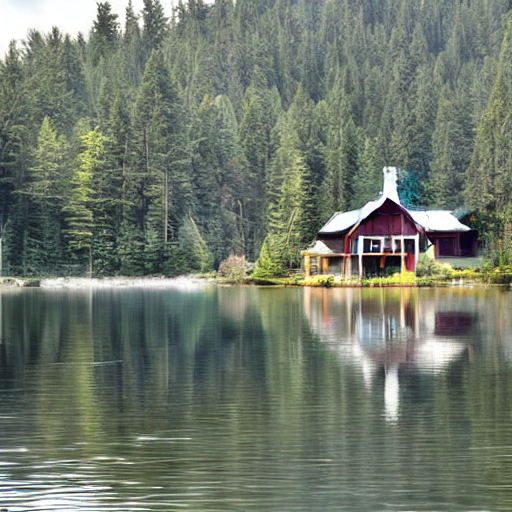

In [18]:
%%time
# 25 min: 1 GPU
# 30 s: 2 GPUs

### testing function
prompt = "a beautiful view of an isolated lake house in an island"
# prompt = "a small ship navigating the sea in a thunderous storm"
# prompt = "Spells of stars and galaxies being cast"
# prompt = "the ethereal beings that create human dreams"
# prompt = "The Ice King and the army of the dead in a freezing landscape"
# prompt = "a constellation warrior battling a monster"
# prompt = "the spirit elements alligning with the earthy elements"

generated_image, time_, result = generate(prompt)
print(time_)
generated_image

In [19]:
result.images

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>]